# Final Capstone Projects

Please refer to the [**Final Capstone Projects**](http://nbviewer.jupyter.org/github/jmportilla/Complete-Python-Bootcamp/tree/master/Final%20Capstone%20Projects/) folder to get all the info on final capstone project ideas and possible solutions!

In [2]:
# Quick project: FizzBuzz
# made as a function so you can pass in different argumments
'''
Fizz Buzz - Write a program that prints the numbers from 1 to 100. But for multiples of three print “Fizz” 
instead of the number and for the multiples of five print “Buzz”. For numbers which are multiples of both 
three and five print “FizzBuzz”.
'''

def FizzBuzz(limit,num1,num2):
    results = []
    
    for n in range(1,limit):
        if n % num1 == 0 and n % num2 == 0:
            results.append('FizzBuzz')
        elif n % num1 == 0:
            results.append('Fizz')
        elif n % num2 == 0:
            results.append('Buzz')
        else:
            results.append(str(n))
    
    return results

In [7]:
array = FizzBuzz(20,2,5)
array

['1',
 'Fizz',
 '3',
 'Fizz',
 'Buzz',
 'Fizz',
 '7',
 'Fizz',
 '9',
 'FizzBuzz',
 '11',
 'Fizz',
 '13',
 'Fizz',
 'Buzz',
 'Fizz',
 '17',
 'Fizz',
 '19']

In [8]:
# Project: Slide Show
'''
Slide Show - Make an application that shows various pictures in a slide show format. 
Optional: Try adding various effects like fade in/out, star wipe and window blinds transitions.

Got help from:
https://www.geeksforgeeks.org/create-a-sideshow-application-in-python/
'''

# Import modules
import tkinter as tk
from tkinter import *
from PIL import Image
from PIL import ImageTk

root = tk.Tk()

# Configure window size: adjust to size of first image
img1 = ImageTk.PhotoImage(Image.open("PBI01.jpg"))
w = img1.width()
h = img1.height()

root.geometry(str(w) + "x" + str(h))

# Load in additional images
img2 = ImageTk.PhotoImage(Image.open("PBI02.jpg"))
img3 = ImageTk.PhotoImage(Image.open("PBI03.jpg"))
img4 = ImageTk.PhotoImage(Image.open("PBI04.jpg"))

l = Label()
l.pack()

# Using recursion to slide to the next image
x = 1

# move() function to change to the next image
def move():
    global x
    
    if x == 5:
        x = 1
    
    if x == 1:
        l.config(image = img1)
    elif x == 2:
        l.config(image = img2)
    elif x == 3:
        l.config(image = img3)
    elif x == 4:
        l.config(image = img4)
    x += 1
    root.after(2000,move)
    
# call move()
move()

# loop
root.mainloop()

In [36]:
# Project: Gif Creator
'''
GIF Creator - A program that puts together multiple images (PNGs, JPGs, TIFFs) to make a smooth GIF that can be exported. 
Optional: Make the program convert small video files to GIFs as well.

Got help from:
https://stackoverflow.com/questions/41228209/making-gif-from-images-using-imageio-in-python
https://stackoverflow.com/questions/53555458/images-order-while-making-gif-using-imageio
https://stackoverflow.com/questions/38433425/custom-frame-duration-for-animated-gif-in-python-imageio
'''

# Import modules
import os
import imageio

# methods for functionality
def get_images(path):
    images = []
    
    for file in sorted(os.listdir(path)):
        if file.endswith('.jpg'):
            images.append(imageio.imread(os.path.join(path, file)))
    
    return images

def make_gif(path, gifName, imageList, speed):
    imageio.mimsave(str(os.path.join(path, gifName)), imageList, duration = speed)

In [38]:
# Make a gif from power bi screenshots
path = os.curdir

imageList = get_images(path)

make_gif(path, 'pbiGif.gif', imageList, 2)

In [137]:
# Watermarking app
'''
Watermarking Application - Have some pictures you want copyright protected? 
Add your own logo or text lightly across the background so that no one can simply steal your graphics off your site. 
Make a program that will add this watermark to the picture. 
Optional: Use threading to process multiple images simultaneously.

Got help from:
https://stackoverflow.com/questions/51103944/display-list-of-python-pil-image-image-as-grid-of-images-in-jupyter-notebook
'''

# Import modules
from PIL import Image
import ipyplot

def get_images2(path):
    images = []
    
    for file in sorted(os.listdir(path)):
        if 'PBI' in file:
            images.append(Image.open(str(file)))
    
    return images

def make_watermarked_image(image, watermark):
    watermark.putalpha(200)
    watermark = watermark.resize((100,100))
    image.paste(watermark,box=(int(image.size[0]/3),int(image.size[1]/3)),mask = watermark)
    return image

def make_watermarked_image_multiple(imageList, watermark):
    watermark.putalpha(200)
    watermark = watermark.resize((100,100))
    
    newImages = []
    
    for img in imageList:
        img.paste(watermark,box=(int(img.size[0]/3),int(img.size[1]/3)),mask = watermark)
        
    return imageList


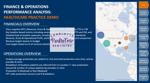
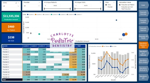
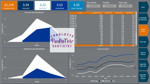
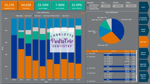
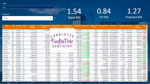
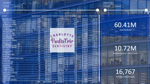
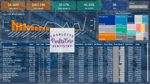
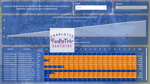


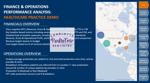
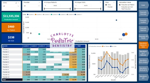
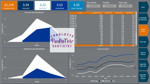
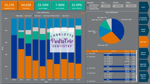
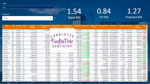
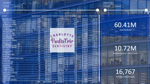
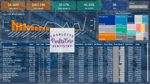
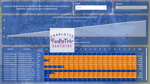

In [138]:
# Make a watermarked image
image = Image.open('PBI01.jpg')
watermark = Image.open('Watermark.jpg')
newImage = make_watermarked_image(image,watermark)


# Make multiple watermarked images
path = os.curdir
imageList = get_images2(path)

imageList = make_watermarked_image_multiple(imageList, watermark)
imgCount = len(imageList)

ipyplot.plot_images(imageList)
